## Python statistics essential training - 04_04_testing

Standard imports

In [7]:
import math
import io

In [8]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [9]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [10]:
pumps = pd.read_csv('pumps.csv')

In [11]:
pumps

,lat,lon,x,y
0,51.513341,-0.136668,0.000000,0.000000
1,51.513876,-0.139586,-0.201858,0.059469
2,51.514906,-0.139671,-0.207738,0.173961
3,51.512354,-0.131630,0.348513,-0.109712
4,51.512139,-0.133594,0.212650,-0.133611
5,51.511542,-0.135919,0.051813,-0.199972
6,51.510019,-0.133962,0.187193,-0.369265
7,51.511295,-0.138199,-0.105910,-0.227428


In [12]:
cholera = pd.read_csv('cholera.csv')

In [13]:
#looking at one record every twenty
cholera.loc[0::20]

,deaths,lat,lon,x,y,closest
0,3,51.513418,-0.137930,-0.087301,0.008559,0
20,2,51.513441,-0.138762,-0.144856,0.011116,1
40,2,51.513025,-0.139036,-0.163811,-0.035126,1
60,1,51.512765,-0.137533,-0.059838,-0.064027,0
80,1,51.512782,-0.136819,-0.010446,-0.062137,0
100,4,51.512250,-0.135394,0.088131,-0.121273,5
120,1,51.513238,-0.134594,0.143473,-0.011449,4
140,1,51.512585,-0.134793,0.129707,-0.084035,4
160,1,51.514065,-0.134364,0.159384,0.080478,0
180,1,51.515149,-0.135395,0.088062,0.200973,0


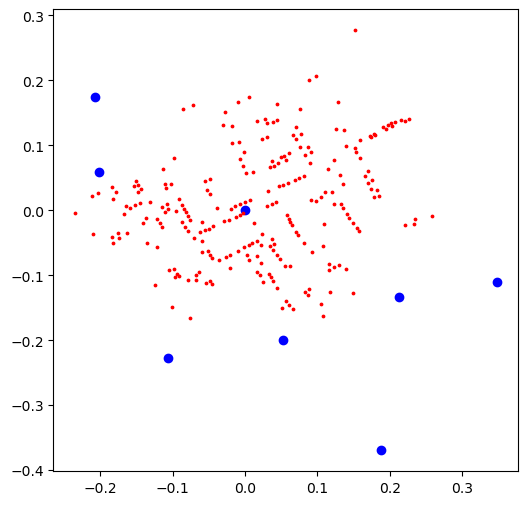

In [16]:
pp.figure(figsize=(6,6))
pp.scatter(pumps.x,pumps.y,color='b')
pp.scatter(cholera.x, cholera.y, color='r', s=3)


In [17]:
import matplotlib
img = matplotlib.image.imread('london.png')
# from google maps found .76km in height and width. Half of 

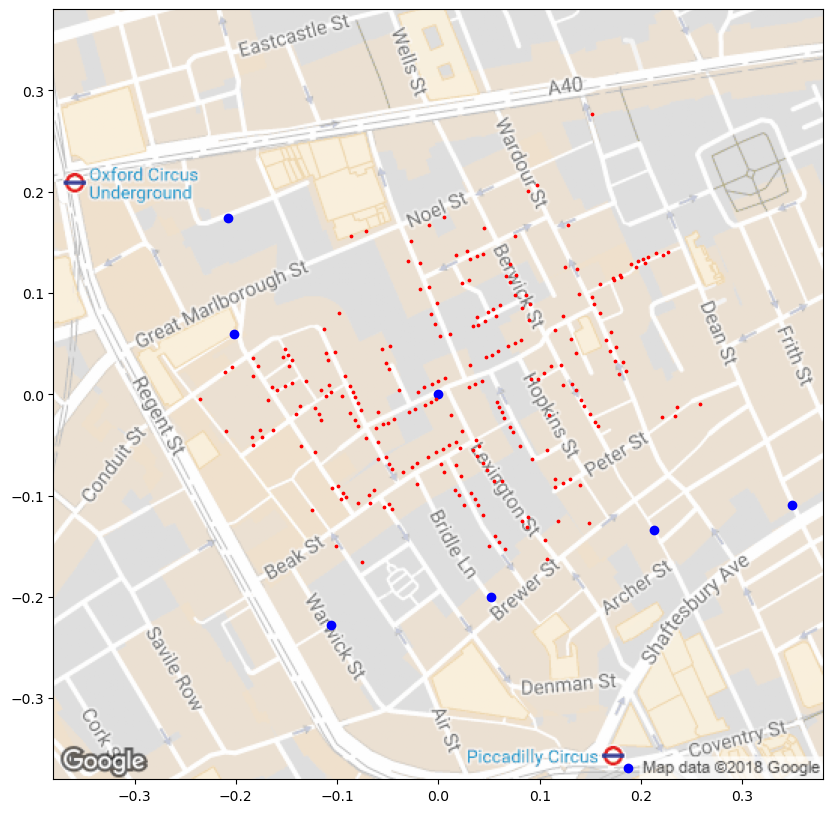

In [18]:
pp.figure(figsize=(10,10))

pp.imshow(img,extent=[-0.38, 0.38, -0.38, 0.38])

pp.scatter(pumps.x, pumps.y, color='b')
pp.scatter(cholera.x, cholera.y, color='r', s=3)


In [19]:
cholera.closest.value_counts()

0    171
1     36
4     19
5     13
7      9
2      2
Name: closest, dtype: int64

In [20]:
cholera.groupby('closest').deaths.sum()

closest
0    340
1     65
2      5
4     40
5     27
7     12
Name: deaths, dtype: int64

In [22]:
def simulate(n):
    return pd.DataFrame({'closest': np.random.choice([0,1,4,5], size = n, p = [0.65, 0.15, 0.10, 0.10])})

In [24]:
simulate(489).closest.value_counts()

0    302
1     78
5     57
4     52
Name: closest, dtype: int64

In [31]:
# sampling disto of # of deaths for Area zero
sampling = pd.DataFrame({'counts': [simulate(489).closest.value_counts()[0] for i in range(10000)]})

<AxesSubplot:>

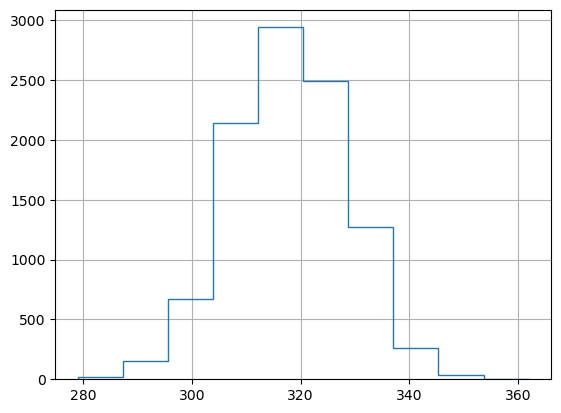

In [32]:
sampling.counts.hist(histtype='step')
# distro generated under the null hypothesis that 
#deaths are proportional to population

In [34]:
scipy.stats.percentileofscore(sampling.counts, 340)


98.29

In [35]:
#This is the P value, the smaller the more strongly we can reject the null hypothesis
100 - 98.29

1.7099999999999937